### INSTRUCTIONS

For this assignment, you must use the AWS VM that has been assigned to you.

Read through the entire framework below once. Note the parts you need to code up.


In [1]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES
!pip install lime

In [2]:
##### DO NOT EDIT THIS CELL!!!
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications 
from tensorflow.keras import preprocessing

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
from lime import lime_image

# Load ResNet50 model pre-trained on ImageNet dataset
model = applications.ResNet50(weights='imagenet')

# Function to preprocess image for ResNet50
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to predict class probabilities using ResNet50
def predict_with_resnet50(image_path):
    preprocessed_image = preprocess_image(image_path)
    preds = model.predict(preprocessed_image)
    return decode_predictions(preds, top=3)[0]



ResNet50 Predictions:
sports_car : 0.689939
racer : 0.24455504
car_wheel : 0.03701184


  0%|          | 0/1000 [00:00<?, ?it/s]

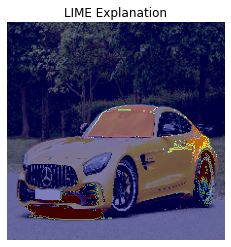

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


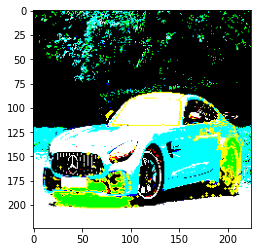

In [4]:
##### EDIT THIS CELL PER THE ISNTRUCTIONS BELOW

# Load the image you want to classify
image_path =  'Sports car.jpeg'

# Predict class probabilities using ResNet50
preds = predict_with_resnet50(image_path)
print("ResNet50 Predictions:")
for pred in preds:
    print(pred[1], ':', pred[2])

    
    
from skimage.segmentation import mark_boundaries
# Load the image as an array, keep all the parameters at defaults
# Ensure the image is of dtype float64
image_array = preprocess_image(image_path)
# Ensure the image is of dtype float64
image_array = np.array(image_array, dtype=np.float64)

### (1.1) ADD YOUR CODE HERE
# create Lime explainer object using LimeImageExplainer() class from lime_image.
#give it a name "explainer"
explainer = lime_image.LimeImageExplainer() ## add your code here"

#refer to this useful documentation
##https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=limeimageexplainer#lime.lime_image.LimeImageExplainer




#Next we apply explain_instance() to explainer object created in the step above
#Call this object "explanation"

explanation = explainer.explain_instance(image_array[0], model.predict, top_labels=5, hide_color=0, num_samples=1000)
#Refer to this helpful documentation to learn more about explain_instance() 
#https://lime-ml.readthedocs.io/en/latest/lime.html#lime.lime_image.LimeImageExplainer.explain_instance



# Get the explanation for the top predicted class and load them into temp, mask

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)



# Plot the original image with explanations
plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


### (1.2) ADD YOUR CODE HERE
temp_pos, mask_pos = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Examine the code that was used to create temp, mask above 
#Copy the code here and modify it to get the explanation for the top predicted class for ONLY the AREAS CONTRIBUTING to prediction

#Use this helpful link to understand better how get_image_and_mask() function works https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=get_image_and_mask#lime.lime_image.ImageExplanation.get_image_and_mask


# Plot the original image with explanations 
plt.imshow(mark_boundaries(temp, mask))




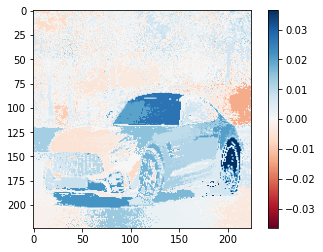

In [5]:
##### DO NOT EDIT THIS CELL!!!

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]
#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [4]:
##### EDIT THIS CELL PER THE ISNTRUCTIONS BELOW

### (1.3) Reflect on the output images produced in cells 3 and 4
 #  What do green areas represent on the second image in cell 3? What does black areas represent on the second image in cell 11?
 #  How do you interpret the blue vs red colored segments in the output image of the cell 4 ?
###############
# PASTE YOUR ANSWER HERE (1-3 sentences summarizing the answer are enough)


- In the second image of cell 3, the green areas highlight superpixels that had a positive influence on the model's prediction of the class "sports_car". These include the car body and wheels.
- The black areas indicate portions of the image that were hidden during LIME's analysis and therefore did not contribute to the explanation.
- In the heatmap of cell 4, the blue segments represent areas that strongly support the prediction, while the red segments indicate areas that work against it or lower the model's confidence.